# Related Issues

## [Research Request - Transit Agency Peer Groups subtask: NTD Characteristics #1442](https://github.com/cal-itp/data-analyses/issues/1442)


## via Juan Matute  email 5/29/2025
In a more advanced version, operators would be clustered into groups of 10 or more based on: 

- mode of service, 
- vehicles available, 
- population density of service territory, 
- job density of service territory, and, perhaps, 
- service area overlap with other transit operators (a GTFS spatial analysis exercise).  

An agency scoring in the bottom 1 or 2 of the cluster would get some remedial help in their triennial audit.Or face consolidation (FWIW, I like the BC Transit model for consolidation starting in 1979).  

Several large transit operators, especially those operating rail, wouldn't be candidates for consolidation and wouldn't fit this clustering method and would instead rely on a triennial audit, where I would expect trends over time for GTFS-RT quality, customer experience metrics (Transit App surveys or mystery shops) and several of these metrics to be considered holistically.  

And perhaps agency costs would be adjusted for regional consumer price index maintained by California Department of Industrial Relations.  Either that or they'd just be clustered with regional peers.


## [Transit Agency Peer Groups literature review #1562](https://github.com/cal-itp/data-analyses/issues/1562)

Link to literature document (requires sharepoint): https://caltrans.sharepoint.com/:w:/r/sites/DOTPMPHQ-DDSContractors/_layouts/15/Doc.aspx?sourcedoc=%7B61CE5D08-BDAC-4947-ADE3-59CA472CF679%7D&file=transit_peer_groups_lit_review.docx&action=default&mobileredirect=true

## [Exploratory clustering analysis with NTD data #1580](https://github.com/cal-itp/data-analyses/issues/1580)

This notebook

## [IBM Definition of Hierarchial Clustering](https://www.ibm.com/think/topics/hierarchical-clustering)
>There are two types of hierarchical clustering:
>- `Agglomerative` or bottom-up approach1 that repeatedly merges clusters into larger ones until a single cluster emerges.
>- `Divisive` or top-down approach that2 starts with all data in a single cluster and continues to split out successive clusters until all clusters are singletons.

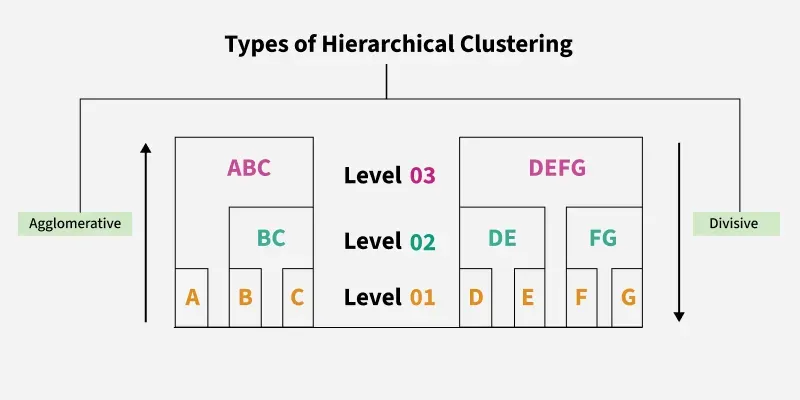

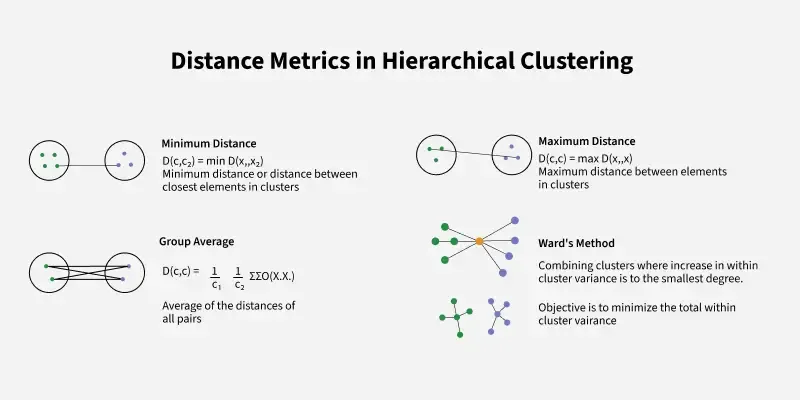

## Scikit-Learns References
- [2.3 Clustering](https://scikit-learn.org/stable/modules/clustering.html)
- [2.3.6 Hierarchical clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering). Explains to use the `AgglomerativeClustering` object with `linkage ="ward"`

Ward:
>Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach. 

In [1]:
# scikit learns imports for clustering
import pandas as pd
from sklearn.cluster import AgglomerativeClustering  # has linage arg for "ward"

In [ ]:
# new imports to query warehouse using SQLAlchemy
# from calitp_data_analysis.tables import tbls
from calitp_data_analysis.sql import get_engine

db_engine = get_engine()

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## example syntax for new query method
```
with db_engine.connect() as connection:
    query = f"""
        SELECT {','.join(time_series_by_mode_opexp_columns)}
        FROM cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_opexp_total
        WHERE state = 'CA'
         AND primary_uza_name LIKE %(uza_match)s
         AND year IN UNNEST(%(years)s)
         AND opexp_total IS NOT NULL
    """
    op_total = pd.read_sql(query, connection, params={'uza_match': '%, CA%', 'years': year_list})

op_total.info()
```

## Test Query
query NTD data from `mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode...`. Same data used for the transit performance metrics

In [ ]:
year_list = [2018, 2019, 2020, 2021, 2022, 2023]

fct_service_base_columns = [
    "source_agency",
    "agency_status",
    "source_city",
    "mode",
    "service",
    "ntd_id",
    "reporter_type",
    "reporting_module",
    "source_state",
    "primary_uza_name",
    "year",
    "uza_area_sq_miles",
    "uza_population",
]

In [ ]:
time_series_by_mode_opexp_columns = fct_service_base_columns + ["opexp_total"]

with db_engine.connect() as connection:
    query = f"""
        SELECT {','.join(time_series_by_mode_opexp_columns)}
        FROM cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_opexp_total
        WHERE state = 'CA'
         AND primary_uza_name LIKE %(uza_match)s
         AND year IN UNNEST(%(years)s)
         AND opexp_total IS NOT NULL
    """
    op_total = pd.read_sql(
        query, connection, params={"uza_match": "%, CA%", "years": year_list}
    )

In [ ]:
time_series_by_mode_upt_columns = fct_service_base_columns + ["upt"]
# mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_upt

with db_engine.connect() as connection:
    query = f"""
        SELECT {','.join(time_series_by_mode_upt_columns)}
        FROM cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_upt
        WHERE source_state = 'CA'
         AND primary_uza_name LIKE %(uza_match)s
         AND year IN UNNEST(%(years)s)
         AND upt IS NOT NULL
    """
    mode_upt = pd.read_sql(
        query, connection, params={"uza_match": "%, CA%", "years": year_list}
    )

In [ ]:
time_series_by_mode_vrh_columns = fct_service_base_columns + ["vrh"]
# mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_vrh

with db_engine.connect() as connection:
    query = f"""
        SELECT {','.join(time_series_by_mode_vrh_columns)}
        FROM cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_vrh
        WHERE source_state = 'CA'
         AND primary_uza_name LIKE %(uza_match)s
         AND year IN UNNEST(%(years)s)
         AND vrh IS NOT NULL
    """
    mode_vrh = pd.read_sql(
        query, connection, params={"uza_match": "%, CA%", "years": year_list}
    )

In [ ]:
time_series_by_mode_vrm_columns = fct_service_base_columns + ["vrm"]
# mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_vrm

with db_engine.connect() as connection:
    query = f"""
        SELECT {','.join(time_series_by_mode_vrm_columns)}
        FROM cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_vrm
        WHERE source_state = 'CA'
         AND primary_uza_name LIKE %(uza_match)s
         AND year IN UNNEST(%(years)s)
         AND vrm IS NOT NULL
    """
    mode_vrm = pd.read_sql(
        query, connection, params={"uza_match": "%, CA%", "years": year_list}
    )

### confirming all queries work

In [ ]:
df_list = [op_total, mode_upt, mode_vrh, mode_vrm]

for df in df_list:
    print(
        f"""Columns:{df.columns},
        Shape:{df.shape} 
        """
    )

## Test combining all queries into big SQL query

In [ ]:
time_series_by_mode_opexp_columns

In [ ]:
", ".join([f"op_total.{col}" for col in time_series_by_mode_opexp_columns])

In [ ]:
# with db_engine.connect() as connection:
#     all_query = f"""
#         SELECT DISTINCT
#             {", ".join([f"op_total.{col}" for col in time_series_by_mode_opexp_columns])},
#             mode_upt.upt,
#             mode_vrh.vrh,
#             mode_vrm.vrm,
#         FROM
#           cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_opexp_total AS op_total
#         JOIN
#           cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_upt AS mode_upt
#         ON
#           op_total.ntd_id = mode_upt.ntd_id
#           AND mode_upt.source_state = 'CA'
#           AND mode_upt.year = 2023
#           AND mode_upt.upt IS NOT NULL
#         JOIN
#           cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_vrh AS mode_vrh
#         ON
#           op_total.ntd_id = mode_vrh.ntd_id
#           AND mode_vrh.source_state = 'CA'
#           AND mode_vrh.year = 2023
#           AND mode_vrh.vrh IS NOT NULL
#         JOIN
#           cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_vrm AS mode_vrm
#         ON
#           op_total.ntd_id = mode_vrm.ntd_id
#           AND mode_vrm.source_state = 'CA'
#           AND mode_vrm.year = 2023
#           AND mode_vrm.vrm IS NOT NULL
#         WHERE
#           op_total.source_state = "CA"
#           AND op_total.year = 2023
#           AND op_total.opexp_total IS NOT NULL
#         LIMIT 1000

#     """
#     test_q = pd.read_sql(all_query, connection)

In [ ]:
# test_q.info()
# need to group by to get the distinct agencies down

In [ ]:
# test_q["source_agency"].value_counts()

---

## Example of scikit learns Agglomerative clustering with ward's linkage


In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# StandardScaler normalize numeric vales (z-score standardization) for each column
# OneHotEncoder turns categorical column into binary columns for each variable (mode_rail, mode_bus, mode_ferry), and assigns 0 or 1.

# Column Transformer used to apply standardscaler and onehotencoder to dataframe (preprocessing)
# Pipeline to tie the column transformer preprocessing AND Agglomerative clustering

In [13]:
initial_df = pd.DataFrame(
    {
        "farebox_recovery": [0.5, 0.7, 0.4, 0.3, 0.6],
        "annual_ridership": [1000000, 2000000, 1500000, 1800000, 1200000],
        "opex": [5000000, 8000000, 7000000, 6500000, 6000000],
        "vrm": [100000, 120000, 110000, 115000, 105000],
        "voms": [80, 90, 85, 88, 83],
        "mode": ["Bus", "Rail", "Bus", "Ferry", "Rail"],
        "service_type": [
            "Directly Operated",
            "Purchased",
            "Directly Operated",
            "Directly Operated",
            "Purchased",
        ],
        "region": ["West", "South", "West", "Northeast", "South"],
    }
)

initial_df

,farebox_recovery,annual_ridership,opex,vrm,voms,mode,service_type,region
0,0.5,1000000,5000000,100000,80,Bus,Directly Operated,West
1,0.7,2000000,8000000,120000,90,Rail,Purchased,South
2,0.4,1500000,7000000,110000,85,Bus,Directly Operated,West
3,0.3,1800000,6500000,115000,88,Ferry,Directly Operated,Northeast
4,0.6,1200000,6000000,105000,83,Rail,Purchased,South


In [14]:
# list out columns by numerical and categorical
numerical_cols = ["farebox_recovery", "annual_ridership", "opex", "vrm", "voms"]
categorical_cols = ["mode", "service_type", "region"]

In [15]:
# preprocessing
# applying standardscaler to numerical columns
# applying onehotencoder to categorical columns
preprocessor = ColumnTransformer(
    [
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['farebox_recovery', 'annual_ridership',
                                  'opex', 'vrm', 'voms']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['mode', 'service_type', 'region'])])

In [16]:
# Clustering pipeline: Pipeline allows you to sequentially apply a list of transformers to preprocess the data and, if desired, 
# conclude the sequence with a final predictor for predictive modeling.
# setting up preprocessing step and then clusering

pipeline = Pipeline(
    [
        ("preprocessing", preprocessor),
        ("clustering", AgglomerativeClustering(n_clusters=3, linkage="ward")),
    ]
)

pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['farebox_recovery',
                                                   'annual_ridership', 'opex',
                                                   'vrm', 'voms']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['mode', 'service_type',
                                                   'region'])])),
                ('clustering', AgglomerativeClustering(n_clusters=3))])

In [18]:
# Fit and assign clusters
fitted_df = initial_df.copy()

fitted_df["cluster"] = pipeline.fit_predict(test_df)

display(
    initial_df,
    fitted_df
)

,farebox_recovery,annual_ridership,opex,vrm,voms,mode,service_type,region
0,0.5,1000000,5000000,100000,80,Bus,Directly Operated,West
1,0.7,2000000,8000000,120000,90,Rail,Purchased,South
2,0.4,1500000,7000000,110000,85,Bus,Directly Operated,West
3,0.3,1800000,6500000,115000,88,Ferry,Directly Operated,Northeast
4,0.6,1200000,6000000,105000,83,Rail,Purchased,South


,farebox_recovery,annual_ridership,opex,vrm,voms,mode,service_type,region,cluster
0,0.5,1000000,5000000,100000,80,Bus,Directly Operated,West,0
1,0.7,2000000,8000000,120000,90,Rail,Purchased,South,2
2,0.4,1500000,7000000,110000,85,Bus,Directly Operated,West,1
3,0.3,1800000,6500000,115000,88,Ferry,Directly Operated,Northeast,1
4,0.6,1200000,6000000,105000,83,Rail,Purchased,South,0


In [19]:
# results of preprocessing
feature_names = preprocessor.get_feature_names_out()
feature_names.tolist()
# can see how the categorical columns were split into binary columns for each option.

['num__farebox_recovery',
 'num__annual_ridership',
 'num__opex',
 'num__vrm',
 'num__voms',
 'cat__mode_Ferry',
 'cat__mode_Rail',
 'cat__service_type_Purchased',
 'cat__region_South',
 'cat__region_West']

In [20]:
processed = preprocessor.fit_transform(test_df)
display(type(processed), processed)
# see what the processed (scaled, normalized)data looks like?

numpy.ndarray

array([[ 0.        , -1.35581536, -1.5       , -1.41421356, -1.46726488,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 1.41421356,  1.35581536,  1.5       ,  1.41421356,  1.35439836,
         0.        ,  1.        ,  1.        ,  1.        ,  0.        ],
       [-0.70710678,  0.        ,  0.5       ,  0.        , -0.05643326,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-1.41421356,  0.81348922,  0.        ,  0.70710678,  0.79006571,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.70710678, -0.81348922, -0.5       , -0.70710678, -0.62076591,
         0.        ,  1.        ,  1.        ,  1.        ,  0.        ]])

In [21]:
processes_df = pd.DataFrame(processed, columns=feature_names)
display(processes_df)
# can see how the numerical columns were standardized to z-scores.

,num__farebox_recovery,num__annual_ridership,num__opex,num__vrm,num__voms,cat__mode_Ferry,cat__mode_Rail,cat__service_type_Purchased,cat__region_South,cat__region_West
0,0.000000,-1.355815,-1.5,-1.414214,-1.467265,0.0,0.0,0.0,0.0,1.0
1,1.414214,1.355815,1.5,1.414214,1.354398,0.0,1.0,1.0,1.0,0.0
2,-0.707107,0.000000,0.5,0.000000,-0.056433,0.0,0.0,0.0,0.0,1.0
3,-1.414214,0.813489,0.0,0.707107,0.790066,1.0,0.0,0.0,0.0,0.0
4,0.707107,-0.813489,-0.5,-0.707107,-0.620766,0.0,1.0,1.0,1.0,0.0


## Test run using real data

### Reading in cleaned data from `transit_performance_metrics`
this merged data from `mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_..` tables

In [22]:
transit_metrics = pd.read_parquet(
    f"gs://calitp-analytics-data/data-analyses/ntd/raw_transit_performance_metrics_data.parquet"
)

### Testing `AgglomerativeClustering` on transit performance metrics

In [23]:
numerical_cols = [
    "upt",
    "vrh",
    "vrm",
    "opexp_total",
]

categorical_cols = [
    "mode",
    "service",
    "reporter_type",
    "primary_uza_name",
]  # leaving out identier columns

# establishing pre-processing steps (normalizing, one-hot encoding)
preprocessor = ColumnTransformer(
    [
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_cols),
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['upt', 'vrh', 'vrm', 'opexp_total']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['mode', 'service', 'reporter_type',
                                  'primary_uza_name'])])

In [24]:
# establishing pipeline: 1. preprocessing, 2. clustering
pipeline = Pipeline(
    [
        ("preprocessing", preprocessor),
        ("clustering", AgglomerativeClustering(n_clusters=5, linkage="ward")),
    ]
)

pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['upt', 'vrh', 'vrm',
                                                   'opexp_total']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['mode', 'service',
                                                   'reporter_type',
                                                   'primary_uza_name'])])),
                ('clustering', AgglomerativeClustering(n_clusters=5))])

In [25]:
# fitting pipeline (preprocessing, clustering) to dataframe. resulting in predicted output
transit_metrics["cluster"] = pipeline.fit_predict(transit_metrics)

transit_metrics.head()

,agency_name,agency_status,city,mode,service,ntd_id,reporter_type,reporting_module,state,primary_uza_name,year,upt,vrh,vrm,opexp_total,RTPA,_merge,cluster
0,City of Porterville (COLT) - Transit Department,Active,Porterville,Demand Response,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2019,13112,2997,43696,572799,Tulare County Association of Governments,both,1
1,City of Porterville (COLT) - Transit Department,Active,Porterville,Demand Response,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2020,11523,3669,48138,686165,Tulare County Association of Governments,both,1
2,City of Porterville (COLT) - Transit Department,Active,Porterville,Bus,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2018,635648,50140,700127,3460906,Tulare County Association of Governments,both,1
3,City of Porterville (COLT) - Transit Department,Active,Porterville,Bus,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2021,145215,21208,244230,2657959,Tulare County Association of Governments,both,1
4,City of Porterville (COLT) - Transit Department,Active,Porterville,Demand Response,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2021,29380,9565,126604,952031,Tulare County Association of Governments,both,1


In [26]:
transit_metrics["cluster"].value_counts()

3    1065
1     824
0     190
4       6
2       6
Name: cluster, dtype: int64

In [27]:
# see how all the categorical columns were encoded
feature_names = preprocessor.get_feature_names_out()
feature_names.tolist()

['num__upt',
 'num__vrh',
 'num__vrm',
 'num__opexp_total',
 'cat__mode_Bus Rapid Transit',
 'cat__mode_Cable Car',
 'cat__mode_Commuter Bus',
 'cat__mode_Commuter Rail',
 'cat__mode_Demand Response',
 'cat__mode_Demand Response Taxi',
 'cat__mode_Ferryboats',
 'cat__mode_Heavy Rail',
 'cat__mode_Hybrid Rail',
 'cat__mode_Light Rail',
 'cat__mode_Monorail / Automated Guideway',
 'cat__mode_Streetcar',
 'cat__mode_Trolleybus',
 'cat__mode_Vanpool',
 'cat__service_Purchased Transportation',
 'cat__service_Purchased Transportation - Taxi',
 'cat__service_Purchased Transportation - Transportation Network Company',
 'cat__reporter_type_Full Reporter',
 'cat__reporter_type_Reduced Reporter',
 'cat__reporter_type_Rural Reporter',
 'cat__primary_uza_name_Bakersfield, CA',
 'cat__primary_uza_name_Camarillo, CA',
 'cat__primary_uza_name_Chico, CA',
 'cat__primary_uza_name_Concord--Walnut Creek, CA',
 'cat__primary_uza_name_Davis, CA',
 'cat__primary_uza_name_El Centro, CA',
 'cat__primary_uza_na

In [28]:
processed = preprocessor.fit_transform(transit_metrics)

In [29]:
processes_df = pd.DataFrame(processed, columns= feature_names)
display(
    transit_metrics.head(),
    processes_df.head() # see how the numerical data was normalized?
) 

,agency_name,agency_status,city,mode,service,ntd_id,reporter_type,reporting_module,state,primary_uza_name,year,upt,vrh,vrm,opexp_total,RTPA,_merge,cluster
0,City of Porterville (COLT) - Transit Department,Active,Porterville,Demand Response,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2019,13112,2997,43696,572799,Tulare County Association of Governments,both,1
1,City of Porterville (COLT) - Transit Department,Active,Porterville,Demand Response,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2020,11523,3669,48138,686165,Tulare County Association of Governments,both,1
2,City of Porterville (COLT) - Transit Department,Active,Porterville,Bus,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2018,635648,50140,700127,3460906,Tulare County Association of Governments,both,1
3,City of Porterville (COLT) - Transit Department,Active,Porterville,Bus,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2021,145215,21208,244230,2657959,Tulare County Association of Governments,both,1
4,City of Porterville (COLT) - Transit Department,Active,Porterville,Demand Response,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2021,29380,9565,126604,952031,Tulare County Association of Governments,both,1


,num__upt,num__vrh,num__vrm,num__opexp_total,cat__mode_Bus Rapid Transit,cat__mode_Cable Car,cat__mode_Commuter Bus,cat__mode_Commuter Rail,cat__mode_Demand Response,cat__mode_Demand Response Taxi,...,"cat__primary_uza_name_Simi Valley, CA","cat__primary_uza_name_Stockton, CA","cat__primary_uza_name_Thousand Oaks, CA","cat__primary_uza_name_Tracy--Mountain House, CA","cat__primary_uza_name_Turlock, CA","cat__primary_uza_name_Vacaville, CA","cat__primary_uza_name_Vallejo, CA","cat__primary_uza_name_Victorville--Hesperia--Apple Valley, CA","cat__primary_uza_name_Visalia, CA","cat__primary_uza_name_Yuba City, CA"
0,-0.188377,-0.287684,-0.292216,-0.251286,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.188490,-0.285976,-0.291458,-0.249971,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.144083,-0.167845,-0.180112,-0.217782,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.178978,-0.241391,-0.257969,-0.227097,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.187220,-0.270988,-0.278057,-0.246887,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### test dendrogram

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [31]:
Z = linkage(transit_metrics, method='ward')  

# same method used by model
# doesnt work because `transit_metrics` wasnt propertly encoded

ValueError: could not convert string to float: 'City of Porterville (COLT) - Transit Department'

In [32]:
Z = linkage(processes_df , method='ward')  # same method used by model

In [34]:
Z

array([[2.06900000e+03, 2.07000000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.07100000e+03, 2.09100000e+03, 0.00000000e+00, 3.00000000e+00],
       [2.07200000e+03, 2.09200000e+03, 0.00000000e+00, 4.00000000e+00],
       ...,
       [4.17400000e+03, 4.17500000e+03, 4.53823006e+01, 1.88900000e+03],
       [4.17600000e+03, 4.17800000e+03, 5.42914306e+01, 2.07900000e+03],
       [4.17700000e+03, 4.17900000e+03, 1.01182912e+02, 2.09100000e+03]])

In [35]:
import matplotlib.pyplot as plt

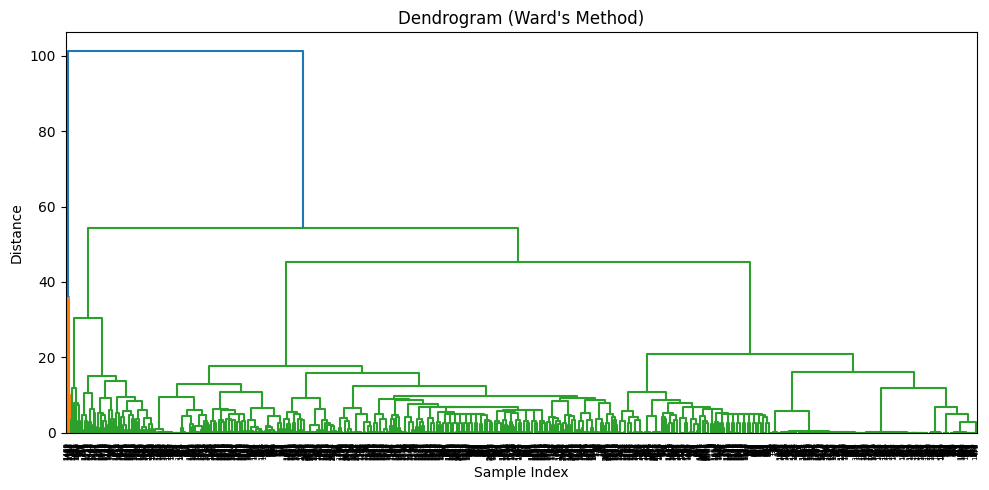

In [40]:
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=transit_metrics.index.tolist(), leaf_rotation=90)
plt.title("Dendrogram (Ward's Method)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()